# Predicting Substance use treatment completion - Modeling

## Capstone Project One : Springboard Data Science career track

### Notebook by Patrico Tyrell


#### 1. The Problem
This project aims to leverage machine learning techniques to investigate disparities in the completion of substance use disorder (SUD) treatment. The primary objective is to develop predictive models capable of identifying individuals who are likely to successfully complete substance use treatment programs. To achieve this goal, the project will harness data from the Treatment Episode Data Set: Discharge (TEDS-D), sourced from the Substance Abuse and Mental Health Services Administration. The project's investigation is motivated by the disparities in SUD treatment services and outcomes.By identifying key predictors of successful treatment and revealing disparities, this project seeks to illuminate strengths and weaknesses in service delivery. This analysis has the potential to boost treatment success rates, ultimately addressing unmet treatment needs. A pivotal first step involves predicting treatment success for a given individual. The project's significance is underscored by the extensive literature dedicated to identifying patient characteristics that enhance the efficacy of SUD treatment.


#### 2. The Data:

The project will use data from the Treatment Episode Data Set: Discharge (TEDS-D), sourced from the Substance Abuse and Mental Health Services Administration.

TEDS-D serves as a comprehensive national data repository, containing annual discharge records from various substance use treatment facilities. These records encompass a wide array of information on admissions for individuals aged 12 and above. Pertinent details include admission demographics such as age, sex, race/ethnicity, and employment status. Additionally, the dataset provides insights into substance use characteristics, including details about the types of substances used, age at first use, routes of use, frequency of use, and prior admissions.

**Features**

- **state**: State of the treatment facility
- **total_treatment_facilities**: Total trement facility in the state
- **SERVICES_Recoded**:Type of treatment service/setting at admission
- **SERVICES_D_Recoded**: Type of treatment service/setting at discharge
- **ALCFLG_Recoded**:Alcohol reported at admission
- **COKEFLG_Recoded**:Cocaine/crack reported at admission
- **MARFLG_Recoded**:Marijuana/hashish reported at admission
- **HERFLG_Recoded**:Heroin reported at admission
- **METHFLG_Recoded**:Non-rx methadone reported at admission
- **OPSYNFLG_Recoded**: Other opiates/synthetics reported at admission  
- **PCPFLG_Recoded**:  PCP reported at admission
- **HALLFLG_Recoded**: Hallucinogens reported at admission
- **MTHAMFLG_Recoded**: Methamphetamine/speed reported at admission
- **AMPHFLG_Recoded**: Other amphetamines reported at admission
- **STIMFLG_Recoded**: Other stimulants reported at admission
- **BENZFLG_Recoded**: Benzodiazepines reported at admission
- **TRNQFLG_Recoded**: Other tranquilizers reported at admission
- **BARBFLG_Recoded**: Barbiturates reported at admission
- **SEDHPFLG_Recoded**: Other sedatives/hypnotics reported at admission
- **INHFLG_Recoded**: Inhalants reported at admission
- **OTCFLG_Recoded**: Over-the-counter medication reported at admission
- **OTHERFLG_Recoded**: Other drug reported at admission
- **DIVISION_Recoded**: Census division
- **ALCDRUG_Recoded**: Substance use type (alcohol only, other drugs only, alcohol and other drugs, or none)
- **Completion_Status**: Treament outcome (complete or incomplete)
- **Length_of_Stay**: Length of stay in treatment
- **Age_Group**: Age Group
- **pop_per_sq_mil**: Population per sqaure mile

#### 3. Importing Neccessary Packages

In [1]:
# Import Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


#### 4. Load Training and Testing Datasets

In [2]:
# Load training data
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

# Load testing data
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

y_train = y_train.values.ravel()  # Convert to 1-dimensional array
y_test = y_test.values.ravel()    # Convert to 1-dimensional array


#### 5. Applying the Machine Learning models

This is a classification problem as we are trying to predict treatment outcome (complete or incomplete). I will explore these conventional machine learning models to build the model and compare performances:

**Logistic Regression**:

Logistic Regression is a simple yet effective binary classification algorithm.
It's a good starting point for classification problems.
It models the probability that a given input belongs to a particular class.
Random Forest Classifier:

**Random Forest**:
This is an ensemble learning method that combines multiple decision trees.
It's robust, handles non-linear relationships well, and is less prone to overfitting.
It can capture complex interactions between features.

**K-Nearest Neighbor (KNN)**:This is a simple, intuitive, and versatile supervised learning algorithm used for classification and regression. In classification tasks, KNN works by classifying a data point based on how its neighbors are classified.

**Naive Bayes**: Naive Bayes is a probabilistic machine learning algorithm based on Bayes’ Theorem, which is used for classification tasks. It is called "naive" because it makes the assumption that the occurrence of a certain feature is independent of the occurrence of other features, even though these features can be dependent on each other in the real world. 

**Gradient Boosting**:Gradient Boosting builds multiple decision trees sequentially, with each tree correcting the errors made by the previous ones. This iterative correction process enhances the model's performance and accuracy over time. 

In [ ]:
#### 5a. Logistic Regression

In [19]:
# Initialize the Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
logistic_regression.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [21]:
# Use the trained model to make predictions on the test data
y_pred = logistic_regression.predict(X_test)


##### Logistic Model Evaluation

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy}')
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print('Logistic Regression Classification Report:')
print(classification_rep)

print('Logistic Regression Confusion Matrix:')
print(confusion_mat)


Logistic Regression Accuracy: 0.7768281290373874
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83     62233
           1       0.76      0.60      0.67     38389

    accuracy                           0.78    100622
   macro avg       0.77      0.74      0.75    100622
weighted avg       0.78      0.78      0.77    100622

Logistic Regression Confusion Matrix:
[[54953  7280]
 [15176 23213]]


**Accuracy**: An accuracy score of approximately 0.777 (or 77.7%) suggests that your logistic regression model is performing reasonably well on the test data. This means that the model correctly predicts the completion status of individuals in the test dataset about 77.7% of the time.

**Classification Report**:

**Precision**: For class 0 (incomplete), the precision is 0.78, indicating that when the model predicts an individual to be incomplete in their treatment, it's correct 78% of the time. For class 1 (complete), the precision is 0.76, meaning that when the model predicts an individual to be complete, it's correct 76% of the time.

**Recall**: For class 0, the recall is 0.88, indicating that the model correctly identifies 88% of all incomplete cases. For class 1, the recall is 0.60, which means the model correctly identifies 60% of all complete cases.

**F1-score**: The F1-score is a harmonic mean of precision and recall. For class 0, the F1-score is 0.83, and for class 1, it's 0.67. It provides a balance between precision and recall.

#### 5b. Random Forest

In [3]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
rf_predictions = rf_classifier.predict(X_test)




In [4]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display the feature names and their importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top N most important features
top_n = 10  # Change this to the number of top features you want to display
print("Top {} Most Important Features:".format(top_n))
print(importance_df.head(top_n))


Top 10 Most Important Features:
                              Feature  Importance
1                      pop_per_sq_mil    0.082780
77          DIVISION_Recoded_Mountain    0.082297
3                       state_Arizona    0.076317
0          total_treatment_facilities    0.068976
85               ALCDRUG_Recoded_None    0.032128
91          Length_of_Stay_61-90 days    0.029512
88        Length_of_Stay_181-365 days    0.027231
92         Length_of_Stay_91-120 days    0.026841
59  MARFLG_Recoded_Substance reported    0.024379
87        Length_of_Stay_121-180 days    0.022806


The Random Forest model achieved an accuracy of approximately 0.7941 on the testing dataset. 

##### Evaluation of Random Forest

In [6]:
# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Calculate the classification report
classification_rep_rf = classification_report(y_test, rf_predictions)

# Calculate the confusion matrix
confusion_mat_rf = confusion_matrix(y_test, rf_predictions)

print("Random Forest Classification Report:\n", classification_rep_rf)
print("\nRandom Forest Confusion Matrix:\n", confusion_mat_rf)


Random Forest Accuracy: 0.7940808173162927
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84     62233
           1       0.75      0.69      0.72     38389

    accuracy                           0.79    100622
   macro avg       0.78      0.77      0.78    100622
weighted avg       0.79      0.79      0.79    100622


Random Forest Confusion Matrix:
 [[53586  8647]
 [12073 26316]]


The model appears to be classifying class 0 (incomplete) better because of class imbalance. Imbalanced datasets can heavily influence the performance of machine learning models, especially in classification tasks. When one class is significantly more prevalent than the other, the model may tend to predict the majority class more often because it's seen more frequently in the training data.

In your case, since there are more instances of class 0 (incomplete), the model might become biased towards predicting it. This can lead to better accuracy, precision, and recall for class 0 while possibly sacrificing performance on class 1 (complete).

To address this issue, I will use different evaluation metrics besides accuracy such as F1-score and ROC-AUC that take class imbalance into account.

#### 5c. K-Nearest Neighbor (KNN)

In [26]:
# Instantiate and train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluate knn model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.7808133410188627
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83     62233
           1       0.74      0.66      0.70     38389

    accuracy                           0.78    100622
   macro avg       0.77      0.76      0.76    100622
weighted avg       0.78      0.78      0.78    100622

KNN Confusion Matrix:
 [[53241  8992]
 [13063 25326]]


#### 5d. Naive Bayes

In [27]:
# Instantiate and train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)



In [28]:
# Evaluate nb model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.7429687344715867
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.80     62233
           1       0.68      0.61      0.64     38389

    accuracy                           0.74    100622
   macro avg       0.73      0.72      0.72    100622
weighted avg       0.74      0.74      0.74    100622

Naive Bayes Confusion Matrix:
 [[51301 10932]
 [14931 23458]]


#### 5e. Gradient Boosting

In [29]:
# Instantiate and train Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [30]:
# Evaluate GB model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.7858520005565384
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.92      0.84     62233
           1       0.82      0.57      0.67     38389

    accuracy                           0.79    100622
   macro avg       0.80      0.74      0.76    100622
weighted avg       0.79      0.79      0.78    100622

Gradient Boosting Confusion Matrix:
 [[57288  4945]
 [16603 21786]]


In [ ]:
#### 6. Model Comparison

The comparison of the four models, namely Logistic Regression, Random Forest, K-Nearest Neighbor (KNN), Naive Bayes, and Gradient Boosting, provides insights into their performance on the given classification problem.

1. **Logistic Regression:** The logistic regression model achieved an accuracy of approximately 0.78. It exhibited a balanced precision-recall trade-off, with a higher precision for class 0 (complete) but a better recall for class 1 (incomplete). The model's F1-score for class 0 is notably higher than that for class 1, indicating that it's better at correctly classifying instances as complete. However, it has relatively lower recall for class 1.

2. **Random Forest:** The random forest model performed slightly better with an accuracy of about 0.79. It exhibited a better balance between precision and recall for both classes compared to logistic regression. The F1-scores for both classes are competitive, making it a solid choice. The random forest model also had fewer false negatives (class 1) than logistic regression.

3. **K-Nearest Neighbor (KNN):** The KNN model achieved an accuracy of around 0.78, similar to logistic regression. It displayed a balanced precision-recall trade-off but slightly lower F1-scores compared to random forest. It is a decent performer, but its recall for class 1 is not as high as random forest.

4. **Naive Bayes:** The Naive Bayes model had the lowest accuracy among the four models, around 0.74. It showed the lowest precision for class 1 and relatively lower recall for class 1 as well. While it has a balanced precision-recall trade-off for class 0, it struggles with classifying instances as incomplete (class 1).

5. **Gradient Boosting:** The gradient boosting model achieved an accuracy of about 0.79, similar to random forest. It displayed a good balance between precision and recall for both classes and competitive F1-scores. It performed well in correctly classifying both complete and incomplete cases, with a balanced precision-recall trade-off.

In summary, the Random Forest and Gradient Boosting models outperformed the others in terms of accuracy and balanced performance for both classes. However, the choice between these two models depends on the specific goals and constraints of the application. If interpretability is important, Logistic Regression might be preferred, but if predictive accuracy is the primary concern, Random Forest or Gradient Boosting would be recommended.

In addition to accuracy, ROC and AUC provide valuable insights into the model's performance, especially when dealing with imbalanced datasets or when you want to weigh the trade-offs between precision and recall. 

AUC Scores:
Logistic Regression: 0.85
Random Forest: 0.86
K-Nearest Neighbors: 0.84
Naive Bayes: 0.79
Gradient Boosting: 0.86


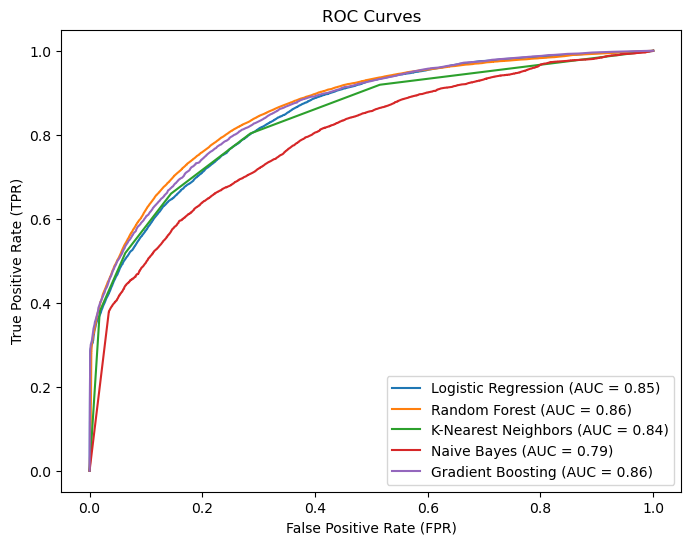

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC and AUC for each model
models = {
    "Logistic Regression": logistic_regression,
    "Random Forest": rf_classifier,
    "K-Nearest Neighbors": knn_model,
    "Naive Bayes": nb_model,
    "Gradient Boosting": gb_model,
}

auc_scores = {}
plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    auc_scores[name] = auc
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Set labels and legend
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curves")
plt.legend()

# Compare AUC scores
print("AUC Scores:")
for name, auc in auc_scores.items():
    print(f"{name}: {auc:.2f}")

plt.show()


consistent with previous metrics, In this case, both Random Forest and Gradient Boosting have the highest AUC scores of 0.86, suggesting that they perform similarly well in terms of ROC curve analysis.Since, the metrics suggest Random Forest and Gradient Boosting, let's proceed with hyperparameter tuning. I will focus on Random Forest.

#### 7. Hyperparameter Tuning Random Forest Model

I will use RandomizedSearchCV to tune the model with a randomized search over hyperparameters. I am using Randomized search is to reduce the computational cost compared to using grid search

In [5]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter grid for Random Forest
rf_param_dist = {
    'n_estimators': randint(100, 500),          # Random values between 100 and 500
    'max_depth': randint(1, 50),               # Random values between 1 and 50
    'min_samples_split': randint(2, 20),        # Random values between 2 and 20
    'min_samples_leaf': randint(1, 20),         # Random values between 1 and 20
}

# Initialize RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(
    rf_classifier, param_distributions=rf_param_dist, n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42
)

# Fit the randomized search to the data
rf_random_search.fit(X_train, y_train)

# Get the best hyperparameters for Random Forest
best_rf_params = rf_random_search.best_params_
best_rf_model = rf_random_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters for Random Forest (Randomized Search):")
print(best_rf_params)




Best Hyperparameters for Random Forest (Randomized Search):
{'max_depth': 21, 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 413}


In [6]:
# Initialize the Random Forest model with the best hyperparameters
tuned_rf_classifier = RandomForestClassifier(
    n_estimators=413, 
    max_depth=21, 
    min_samples_split=13, 
    min_samples_leaf=1, 
    random_state=42
)

# Fit the model to the training data
tuned_rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_tuned_rf = tuned_rf_classifier.predict(X_test)

# Evaluate the model
tuned_rf_accuracy = accuracy_score(y_test, y_pred_tuned_rf)
print(f"Tuned Random Forest Accuracy: {tuned_rf_accuracy}")


Tuned Random Forest Accuracy: 0.8055892349585577


In [8]:
# Calculate ROC-AUC score
tuned_roc_auc = roc_auc_score(y_test, y_pred_tuned_rf)
print(f"ROC-AUC Score: {tuned_roc_auc}")

ROC-AUC Score: 0.7732835821834503


While accuracy increased slightly, ROC-AUC Score decreased after hyper tuning using the random search.The decrease in the ROC-AUC score after hyperparameter tuning using random search could be due to the randomness involved in the search process. Randomized search explores a random subset of the hyperparameter space, and in some cases, it may not find hyperparameters that improve the model's performance on your specific dataset.I will perform cross-validation to get a more stable estimate of the model's performance. This can help ensure that the hyperparameters are chosen based on more robust performance estimates.

In [ ]:
#### 8. Cross-Validation

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier with the best hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=413, 
    max_depth=21, 
    min_samples_split=13, 
    min_samples_leaf=1, 
    random_state=42
)

# Perform 5-fold cross-validation
scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='roc_auc')

# Print the cross-validation scores
print("Cross-Validation ROC-AUC Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
print("Mean ROC-AUC:", scores.mean())
print("Standard Deviation:", scores.std())


Cross-Validation ROC-AUC Scores: [0.87920127 0.8781697  0.87955311 0.8774517  0.87899292]
Mean ROC-AUC: 0.8786737414964586
Standard Deviation: 0.0007616949417755992


I performed 5-fold cross-validation on your Random Forest model, and the results indicate that the mean ROC-AUC score of approximately 0.879 suggests that your Random Forest model is performing well on the cross-validated subsets of your training data. The standard deviation is relatively small, indicating that the model's performance is consistent across different folds.
This information provide more confidence in the model's predictive ability and its stability when applied to unseen data.

In [ ]:
#### 9. Feature Importance of Random Forest

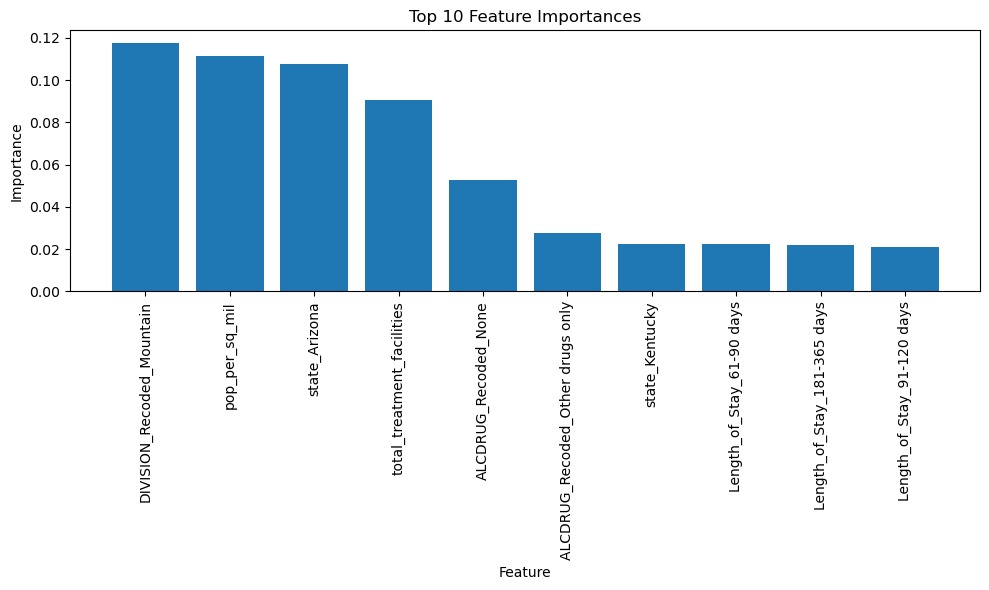

In [9]:
# Get feature importances from the model
feature_importances = best_rf_model.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort feature importances in descending order and get the indices
indices = feature_importances.argsort()[::-1]

# Limit the number of features
num_features = 10

# Plot the top N feature importances
plt.figure(figsize=(10, 6))
plt.title("Top {} Feature Importances".format(num_features))
plt.bar(range(num_features), feature_importances[indices[:num_features]], align="center")
plt.xticks(range(num_features), feature_names[indices[:num_features]], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


The top 10 feature importances provide insights into which features are most influential in predicting treatment success:
1. DIVISION_Recoded_Mountain (0.1177): The Census division, specifically "Mountain," appears to be highly influential. It suggests that treatment outcomes may vary significantly by region, with the Mountain division having a strong positive impact on treatment success.

2. pop_per_sq_mil (0.1113): Population density per square mile is the second most important feature. It indicates that areas with higher population density may have a positive influence on treatment success. This could be due to better access to resources and support services.

3. state_Arizona (0.1077): The state of Arizona seems to be a crucial predictor, suggesting that individuals receiving treatment in Arizona may have a higher likelihood of successful treatment completion.

4. total_treatment_facilities (0.0908): The total number of treatment facilities in the state is a significant factor. More treatment facilities could mean better access to care, increasing the chances of successful treatment outcomes.

5. ALCDRUG_Recoded_None (0.0525): Individuals who do not report alcohol or drug use at admission have a positive impact on treatment success. This feature suggests that those without alcohol use issues have a higher likelihood of completing treatment successfully.

6. ALCDRUG_Recoded_Other drugs only (0.0275): Conversely, individuals who report using only other drugs (not alcohol) at admission also contribute positively to treatment success.

7. state_Kentucky (0.0226): Kentucky's state-specific impact on treatment outcomes is relatively smaller than Arizona, but it still plays a role in predicting success.

8. Length_of_Stay_61-90 days (0.0225): Longer lengths of stay within the range of 61-90 days have a positive influence on treatment success. This suggests that extended treatment durations may be more effective.

9. Length_of_Stay_181-365 days (0.0219): Similarly, very long stays (181-365 days) also contribute positively to successful treatment outcomes.

10. Length_of_Stay_91-120 days (0.0208): Stays within the range of 91-120 days are another important factor, indicating that moderate-duration treatments have a favorable impact.


#### 10. Final Predictions

In [44]:
# Fit the model to the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on your dataset
final_rf_predictions = best_rf_model.predict(X_test)

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({'Predictions': final_rf_predictions})

# Adding X_test index to the predictions DataFrame
predictions_df['Index'] = X_test.index

# Save the predictions as a CSV file
predictions_df.to_csv('final_rf_predictions.csv', index=False)



## Conclusion

In my quest to predict treatment completion, I examined various classification models, using 28 distinct features derived from the dataset, either directly or through engineering. The task was to discern which model could best categorize individuals based on their likelihood of completing their treatment. Here are the five classification models I explored:

- Logistic Regression
- K-Nearest Neighbor (KNN)
- Random Forest
- Naive Bayes
- Gradient Boost

In my evaluation, I assessed each model's performance in terms of accuracy scores and ROC-AUC scores on both the training and test datasets. The ROC-AUC score, which quantifies a model's ability to discriminate between classes, served as a critical metric for my evaluation. Among the contenders, two models stood out as the top performers: Random Forest and Gradient Boost, both belonging to the ensemble model category and based on decision trees. Ultimately, my focus narrowed down to Random Forest for further exploration.

To maximize the efficiency of hyperparameter tuning for Random Forest and reduce computation time, I employed a random search algorithm. This approach allowed me to find optimized hyperparameters that, when applied to my model, led to an increase in accuracy. However, it's important to note that the ROC-AUC score experienced a slight decrease. This phenomenon highlights the delicate trade-off between precision and recall when making predictions.

Taking the analysis a step further, I conducted 5-fold cross-validation on the Random Forest model. The results revealed an encouraging mean ROC-AUC score of approximately 0.879, indicating that my model consistently performs well across different subsets of the training data. The low standard deviation further instills confidence in the model's predictive capability and its stability when faced with new, unseen data.

Regarding feature importance, the features importances highlight the significance of geographic factors, population density, treatment facility availability, substance use patterns, and treatment duration in predicting treatment success. Further analysis and domain expertise can help in understanding the specific dynamics of these features and how they interact to influence treatment outcomes.

In conclusion, I have successfully developed and fine-tuned a Random Forest model that showcases promising predictive power. It provides a valuable tool for assessing treatment completion likelihood based on a range of influential factors. The culmination of my efforts is a set of final predictions, saved as a CSV file, which can be deployed for real-world applications and decision-making processes.



## Future Directions

While my journey through model selection and hyperparameter tuning has yielded encouraging results, there are several avenues for future exploration and improvement:

1. **Feature Engineering**: Continue to explore feature engineering techniques to create new variables or transform existing ones, potentially uncovering additional patterns that can enhance predictive performance.

2. **Feature Importance**: Dig deeper into the feature importances generated by the Random Forest model.

3. **Add more Variables**: Explore the potential impact of socioeconomic and demographic factors on treatment success, such as income, education, race, ethnicity, sex and employment status.

3. **Ensemble Methods**: Experiment with other ensemble methods like XGBoost, LightGBM, or AdaBoost to determine if any of them can surpass the performance of Random Forest.

4. **Data Collection**: Consider expanding the dataset with additional relevant features or collecting more recent data. This can lead to improved model generalization.

5. **Imbalanced Data Handling**: Since the dataset is highly imbalanced (more incomplete cases than complete cases), I can explore techniques such as oversampling, undersampling, or the use of synthetic data generation methods to mitigate class imbalance.

6. **Model Interpretability**: Investigate techniques for improving the interpretability of Random Forest models, as they can sometimes be seen as "black boxes." Techniques like SHAP (SHapley Additive exPlanations) values or partial dependence plots can shed light on model predictions.

7. **Deployment**: Since I would like to use the model in practice, I will have to consider the deployment pipeline, model monitoring, and integration with existing systems.

8. **Ethical Considerations**: I have to ensure that the model is used in an ethical and responsible manner, avoiding biases and unintended consequences.
